In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta 4

## Implementation

In [34]:
def solve_pendulums(inic, g = 9.81, L = [2, 2], k = 10, start_time = 0, end_time = 10, dt = 0.001, saa = True):
    def dot(*args): # args: [theta 1, theta 2, omega 1, omega 2]
        thetas = args[0:2]
        omegas = args[2:4]
        
        approx = (lambda arg: np.sin(arg), lambda arg: arg)[saa]
        
        return np.array([
            omegas[0], # theta 1 dot
            omegas[1], # theta 2 dot
            -(g/L[0]) * approx(thetas[0]) - k * (approx(thetas[0]) - approx(thetas[1])), # omega 1 dot
            -(g/L[1]) * approx(thetas[1]) + k * (approx(thetas[0]) - approx(thetas[1])) # omega 2 dot
        ])
    
    phase = np.array(inic) # theta 1, theta 2, omega 1, omega 2
    phases = []
    
    t = np.arange(start_time, end_time, dt)
    
    for _ in t:
        phases.append(phase) # append phase at start as arange already contains initial in time (0)

        K1 = dt * dot(*phase) # Euler iteration, returns (theta1_next, theta2_next, omega1_next, omega2_next)
        K2 = dt * dot(*(phase + K1/2))
        K3 = dt * dot(*(phase + K2/2))
        K4 = dt * dot(*(phase + K3))

        phase = phase + K1/6 + K2/3 + K3/3 + K4/6
        
    thetas = [[elem[0] for elem in phases], [elem[1] for elem in phases]] # theta 1, theta 2
    omegas = [[elem[2] for elem in phases], [elem[3] for elem in phases]]
    
    return (t, thetas, omegas)

## Results

In [35]:
def plot_pendulums(inic, saa_switch):
    t, thetas, omegas = solve_pendulums(inic, saa = saa_switch)
    plt.figure(figsize=(15, 5))

    plotting_data = [
        {
            "varname": r"Angular Displacements $\theta_1$, $\theta_2$",
            "data": thetas, 
            "subvars": [r"$\theta_1$", r"$\theta_2$"], 
            "y_units": "Rad"
        },
        {
            "varname": r"Angular Velocities $\omega_1$, $\omega_2$", 
            "data": omegas,
            "subvars": [r"$\omega_1$", r"$\omega_2$"],
            "y_units": "Rad/s"
        },
    ]

    for i in range(len(plotting_data)):
        plt.subplot(1, len(plotting_data), i + 1) # rows, cols, index

        obj = plotting_data[i]
        plt.plot(t, obj["data"][0], label=obj["subvars"][0])
        plt.plot(t, obj["data"][1], label=obj["subvars"][1])

        plt.title(fr"""{obj["varname"]}
{["without", "with"][saa_switch]} SAA
with $\theta_1(0) = {np.round(np.degrees(inic))[0]}^\circ$, $\theta_2(0) = {np.round(np.degrees(inic))[1]}^\circ$, 
and $\omega_1(0) = {np.round(np.degrees(inic))[2]}$ deg/s, $\omega_2(0) = {np.round(np.degrees(inic))[3]}$ deg/s""")

        plt.xlabel("Time (s)")
        plt.ylabel(obj["y_units"])
        plt.legend()

    plt.show()

### 1. With $\sin \theta \approx \theta$

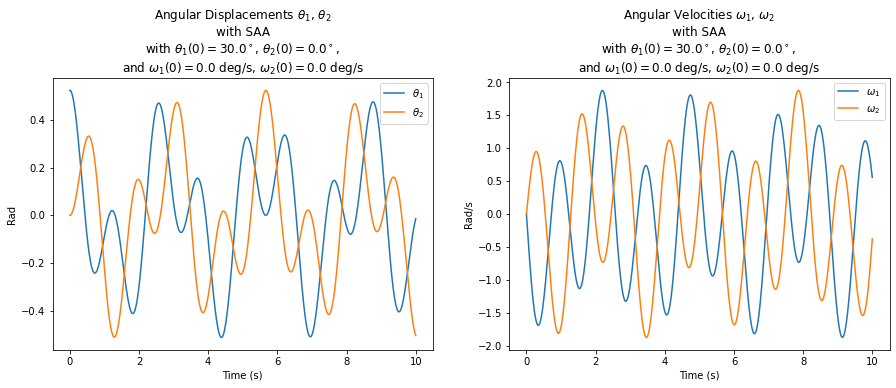

In [36]:
%matplotlib inline

# Initial conditions [theta1 (in Rad), theta2 (in Rad), omega1 (in Rad), omega2 (in Rad)]
inic = [np.radians(30), np.radians(0), np.radians(0), np.radians(0)] 
saa_switch = True

plot_pendulums(inic, saa_switch)

### 2. Without $\sin \theta \approx \theta$

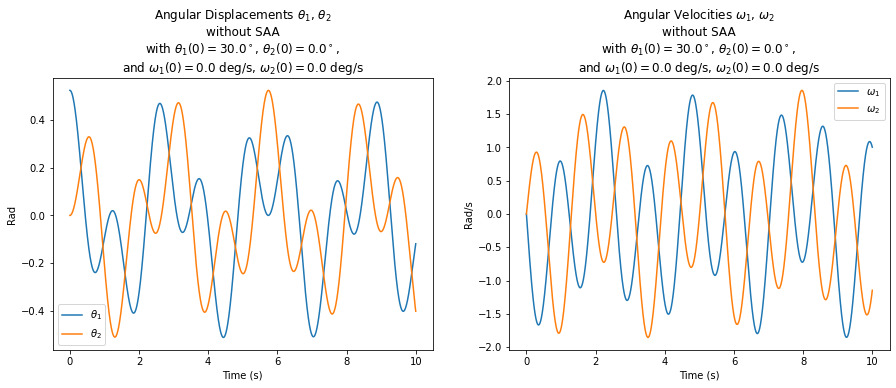

In [37]:
%matplotlib inline

# Initial conditions [theta1 (in Rad), theta2 (in Rad), omega1 (in Rad), omega2 (in Rad)]
inic = [np.radians(30), np.radians(0), np.radians(0), np.radians(0)] 
saa_switch = False

plot_pendulums(inic, saa_switch)

### 3. Comparing with and without $\sin \theta \approx \theta$ with changing initial conditions

In [38]:
def compare_SAA(inic):
    plt.figure(figsize=(15, 5))
    
    plotting_data = [
        {
            "varname": r"Angular Displacements $\theta_1$, $\theta_2$", 
            "solutions_index": 1, 
            "subvars": [r"$\theta_1$", r"$\theta_2$"],
            "y_units": "Rad"
        },
        {
            "varname": r"Angular Velocities $\omega_1$, $\omega_2$", 
            "solutions_index": 2, 
            "subvars": [r"$\omega_1$", r"$\omega_2$"],
            "y_units": "Rad/s"
        },
    ]
    
    label_switch = lambda saa_switch: ["without", "with"][saa_switch]

    for i in range(len(plotting_data)):
        plt.subplot(1, len(plotting_data), i + 1) # rows, cols, index

        obj = plotting_data[i]
        for saa_switch in [True, False]:
            solutions = solve_pendulums(inic, saa = saa_switch) # t, thetas, omegas

            plt.plot(solutions[0], solutions[obj["solutions_index"]][0], 
                     label=f'{obj["subvars"][0]} {label_switch(saa_switch)} SAA')
            
            plt.plot(solutions[0], solutions[obj["solutions_index"]][1], 
                     label=f'{obj["subvars"][1]} {label_switch(saa_switch)} SAA')
        
        plt.title(fr"""{obj["varname"]}
with and without SAA
with $\theta_1(0) = {np.round(np.degrees(inic))[0]}^\circ$, $\theta_2(0) = {np.round(np.degrees(inic))[1]}^\circ$, 
and $\omega_1(0) = {np.round(np.degrees(inic))[2]}$ deg/s, $\omega_2(0) = {np.round(np.degrees(inic))[3]}$ deg/s""")

        plt.xlabel("Time (s)")
        plt.ylabel(obj["y_units"])
        plt.legend()

    plt.show()

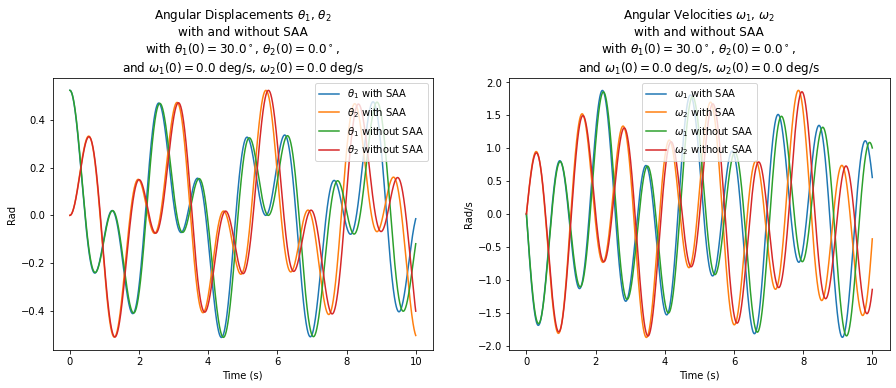

In [7]:
%matplotlib inline

# Initial conditions [theta1 (in Rad), theta2 (in Rad), omega1 (in Rad), omega2 (in Rad)]
inic = [np.radians(30), np.radians(0), np.radians(0), np.radians(0)] 

compare_SAA(inic)

# Animation

In [39]:
# Spring generator from https://github.com/nrsyed/utilities/tree/master/spring
import math
import numpy as np

def spring_points(start, end, nodes, width):
    """!
    Return a list of points corresponding to a spring.
    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """

    # Check that nodes is at least 1.
    nodes = max(int(nodes), 1)

    # Convert to numpy array to account for inputs of different types/shapes.
    start, end = np.array(start).reshape((2,)), np.array(end).reshape((2,))

    # If both points are coincident, return the x and y coords of one of them.
    if (start == end).all():
        return start[0], start[1]

    # Calculate length of spring (distance between endpoints).
    length = np.linalg.norm(np.subtract(end, start))

    # Calculate unit vectors tangent (u_t) and normal (u_t) to spring.
    u_t = np.subtract(end, start) / length
    u_n = np.array([[0, -1], [1, 0]]).dot(u_t)

    # Initialize array of x (row 0) and y (row 1) coords of the nodes+2 points.
    spring_coords = np.zeros((2, nodes + 2))
    spring_coords[:,0], spring_coords[:,-1] = start, end

    # Check that length is not greater than the total length the spring
    # can extend (otherwise, math domain error will result), and compute the
    # normal distance from the centerline of the spring.
    normal_dist = math.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2

    # Compute the coordinates of each point (each node).
    for i in range(1, nodes + 1):
        spring_coords[:,i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    return spring_coords[0,:], spring_coords[1,:]

In [40]:
from matplotlib import animation
import ffmpy

def animate_pendulums(inic, saa_switch, L = np.array([0.3, 0.3]), frames = 1000, interval = 1, 
                      compare = False, transparent = False):
    
    t, thetas, omegas = solve_pendulums(inic, L = L, saa = saa_switch)
    
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    pos = np.array([0.33, 1/2, 0.66, 1/2]).reshape(2, 2)

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.set(ylim=(0, 1))
    ax.set(xlim=(0, 1))
    
    if not compare:
        plot_title = fr"""Coupled Pendulum solved using Runge-Kutta 4 
{["without", "with"][saa_switch]} SAA
with $\theta_1(0) = {np.round(np.degrees(inic))[0]}^\circ$, $\theta_2(0) = {np.round(np.degrees(inic))[1]}^\circ$, 
and $\omega_1(0) = {np.round(np.degrees(inic))[2]}$ deg/s, $\omega_2(0) = {np.round(np.degrees(inic))[3]}$ deg/s"""
    else:
        plot_title = fr"""Coupled Pendulums solved using Runge-Kutta 4
blue: without SAA
green: with SAA
with $\theta_1(0) = {np.round(np.degrees(inic))[0]}^\circ$, $\theta_2(0) = {np.round(np.degrees(inic))[1]}^\circ$, 
and $\omega_1(0) = {np.round(np.degrees(inic))[2]}$ deg/s, $\omega_2(0) = {np.round(np.degrees(inic))[3]}$ deg/s"""

    if transparent:
        # set figure background opacity (alpha) to 0
        fig.patch.set_alpha(0.)
    else:
        plt.title(plot_title)
    
    plt.axis('off')

    def get_line_coords(start, end):
        x = [coord[0] for coord in [start, end]]
        y = [coord[1] for coord in [start, end]]

        return x, y # [[x1, x2], [y1, y2]]

    # [[x1, y1], [x2, y2]] + [[x1, y1], [x2, y2]]
    def bob_positions(lengths, angles):
        x1, x2 = lengths * np.sin(angles)
        y1, y2 = -lengths * np.cos(angles)

        return pos + np.array([x1, y1, x2, y2]).reshape(2, 2)

    bridge = ax.plot(*get_line_coords(*pos), color="black", linewidth=5)[0]
    spring = ax.plot([], [], color="black")[0]

    lines = [ax.plot([], [], color=["black", "brown"][saa_switch])[0] for _ in range(2)]
    bobs = [plt.Circle((0, 0), 0.02, color=["blue", "green"][saa_switch]) for _ in range(2)]

    patches = [*lines, *bobs, spring]

    step = len(thetas[0]) // frames
    thetas_animate = [theta[::step] for theta in thetas]

    def init():
        lines = patches[0:2]
        bobs = patches[2:4]
        spring = patches[4]
        
        init_angles = [theta[0] for theta in thetas]

        for i in range(2):
            lines[i].set_data(*get_line_coords(pos[i], bob_positions(L, init_angles)[i]))

            bobs[i].center = bob_positions(L, init_angles)[i]
            ax.add_patch(bobs[i])

        spring.set_data(*spring_points(*bob_positions(L, init_angles), 15, 0.03))

        return patches

    def animate(frame):
        lines = patches[0:2]
        bobs = patches[2:4]
        spring = patches[4]

        angles = [theta[frame] for theta in thetas_animate]

        for i in range(2):
            lines[i].set_data(*get_line_coords(pos[i], bob_positions(L, angles)[i]))

            bobs[i].center = bob_positions(L, angles)[i]

        spring.set_data(*spring_points(*bob_positions(L, angles), 15, 0.03))

        return patches

    return animation.FuncAnimation(fig, animate, init_func = init, interval = interval, frames = frames, blit=True)

def save_anim(anim, filename, transparent = False, delete_intermediary = True):
    options = {
        "fps": 30,
        "dpi": 300, 
    }
    transparent_options = {
        "bitrate": -1,
        "codec": "png",
        "savefig_kwargs": {'transparent': True, 'facecolor': 'none'}
    }
    
    if transparent:
        anim.save(
            f"{filename}.avi",
            **options,
            **transparent_options
        )
    else:
        anim.save(
            f"{filename}.avi",
            **options
        )

    ff = ffmpy.FFmpeg(
        inputs={f"{filename}.avi": None},
        outputs={f"{filename}.gif": '-filter:v "scale=-1:1000"'},
        global_options=["-y"]
    ).run()
    
    # print(ff.cmd)
    
    if delete_intermediary:
        import os
        os.remove(f"{filename}.avi")

### 1. With $\sin \theta \approx \theta$

<IPython.core.display.Javascript object>


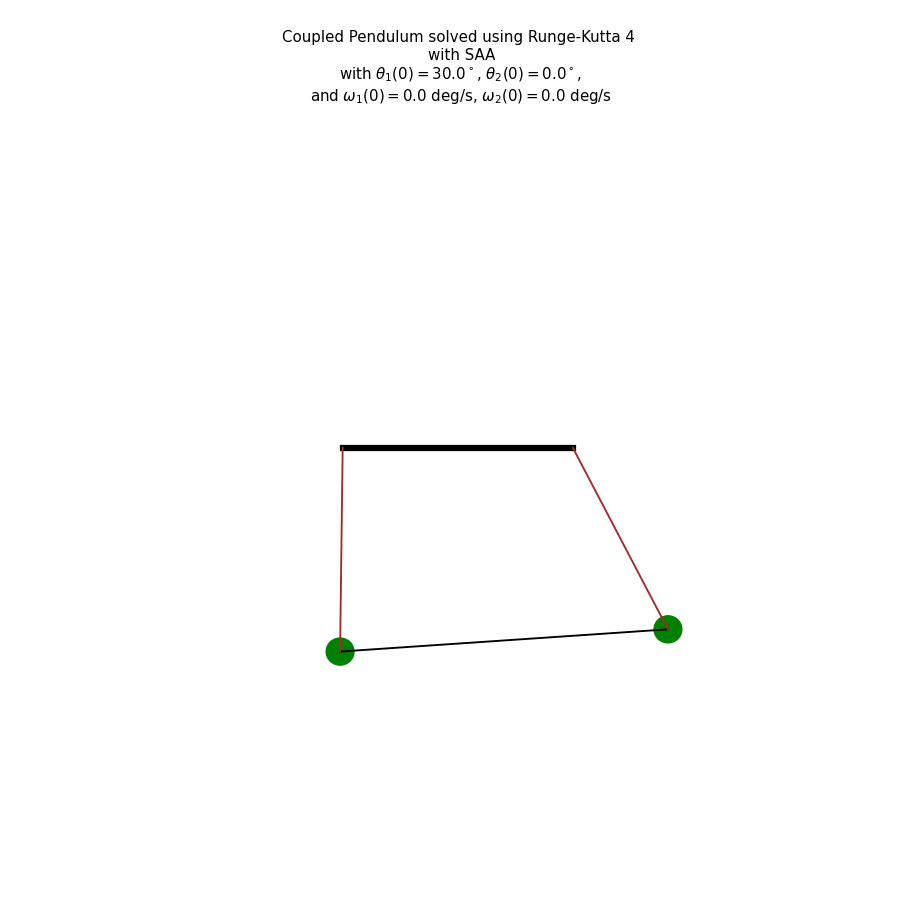

In [41]:
# Displaying animation
%matplotlib notebook

# Initial conditions [theta1 (in Rad), theta2 (in Rad), omega1 (in Rad), omega2 (in Rad)]
inic = [np.radians(30), np.radians(0), np.radians(0), np.radians(0)]

anim_with_saa = animate_pendulums(inic, True)

In [42]:
# Saving animation

save_anim(anim_with_saa, "coupled_pendulum_RK4_with_SAA")
print("Done!")

Done!


### 2. Without $\sin \theta \approx \theta$

<IPython.core.display.Javascript object>


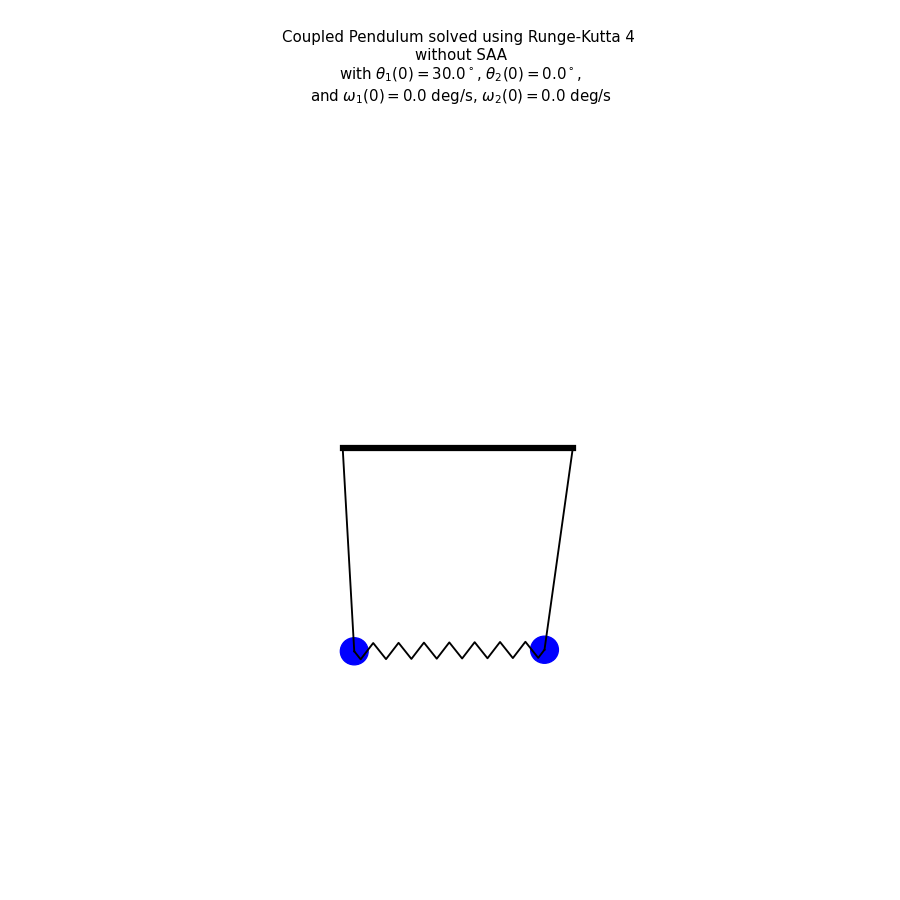

In [43]:
# Displaying animation
%matplotlib notebook

# Initial conditions [theta1 (in Rad), theta2 (in Rad), omega1 (in Rad), omega2 (in Rad)]
inic = [np.radians(30), np.radians(0), np.radians(0), np.radians(0)]

anim_without_saa = animate_pendulums(inic, False)

In [44]:
# Saving animation

save_anim(anim_without_saa, "coupled_pendulum_RK4_without_SAA")
print("Done!")

Done!


### 3. Comparing with and without $\sin \theta \approx \theta$ with changing initial conditions

<IPython.core.display.Javascript object>


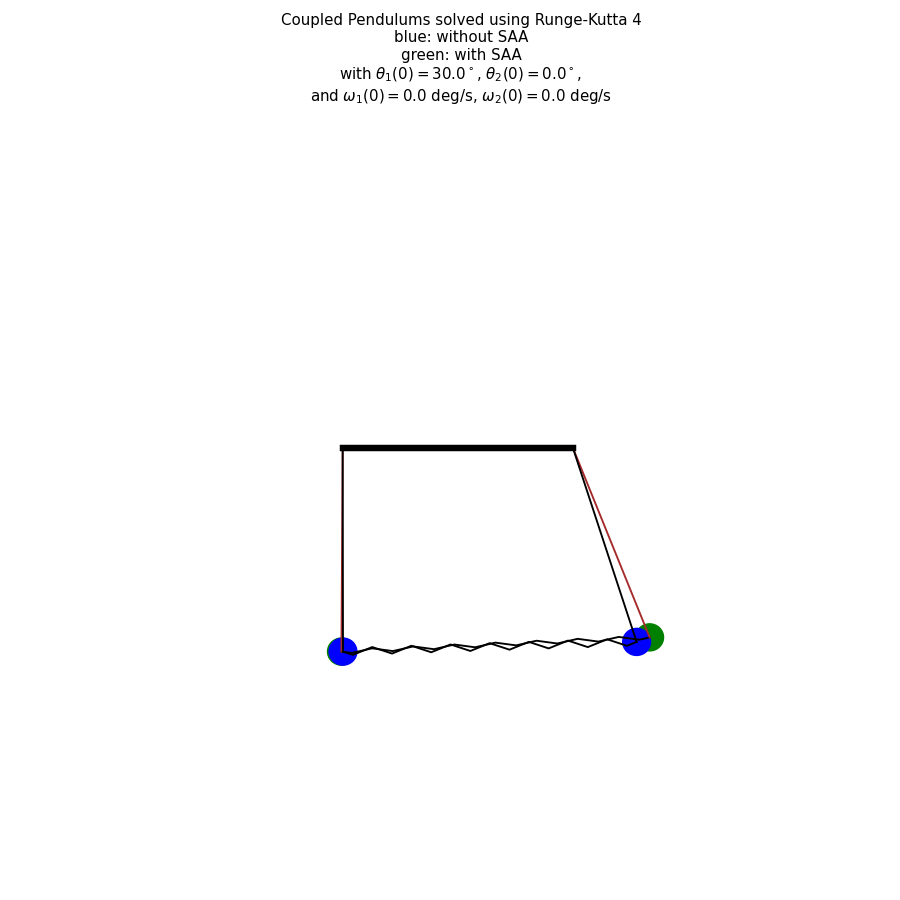

In [45]:
# Displaying animation
%matplotlib notebook

# Initial conditions [theta1 (in Rad), theta2 (in Rad), omega1 (in Rad), omega2 (in Rad)]
inic = [np.radians(30), np.radians(0), np.radians(0), np.radians(0)]

anim_linear = animate_pendulums(inic, True, compare = True)
anim_nonlinear = animate_pendulums(inic, False, compare = True)

In [ ]:
# Saving animation

bg = "staging_bg_coupled"
overlay = "staging_overlay_coupled"
final = "merged_coupled"

print(f"1. Creating {bg}.avi")
plt.clf()
anim_linear = animate_pendulums(inic, True, compare = True)
save_anim(anim_linear, bg, delete_intermediary = False)
print(f"-\tCreated {bg}.avi")

print(f"2. Creating {overlay}.avi")
plt.clf()
anim_nonlinear = animate_pendulums(inic, False, compare = True, transparent = True)
save_anim(anim_nonlinear, overlay, transparent = True, delete_intermediary = False)
print(f"-\tCreated {overlay}.avi")

import os

# remove unnecessary gifs, we only need avis
os.remove(f"{bg}.gif") 
os.remove(f"{overlay}.gif")

print("3. Running ffmpeg to overlay video files")
os.system(f"""ffmpeg -y -i {bg}.avi -vf "movie={overlay}.avi [inner]; [in][inner] overlay =0:0 [out]" {final}.avi""")
print(f"-\tOverlay result {final}.avi ready")

os.remove(f"{bg}.avi")
os.remove(f"{overlay}.avi")

print(f"4. Converting {final}.avi to gif")
ff = ffmpy.FFmpeg(
    inputs={f"{final}.avi": None},
    outputs={"coupled_pendulum_RK4_with_and_without_SAA.gif": '-filter:v "scale=-1:1000"'},
    global_options=["-y"]
).run()

print("-\tcoupled_pendulum_RK4_with_and_without_SAA.gif ready")

os.remove(f"{final}.avi")

1. Creating staging_bg_coupled.avi
-	Created staging_bg_coupled.avi
2. Creating staging_overlay_coupled.avi
-	Created staging_overlay_coupled.avi
3. Running ffmpeg to overlay video files
